<a href="https://colab.research.google.com/github/HarjotSingh-b18055/R-programming/blob/main/Assignment_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Q1
# Create a vector of 1000 random strings
random_strings <- replicate(1000, paste(sample(LETTERS, 10, replace = TRUE), collapse = ""))

# Write the vector to a file
writeLines(random_strings, "random_strings.txt")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 100


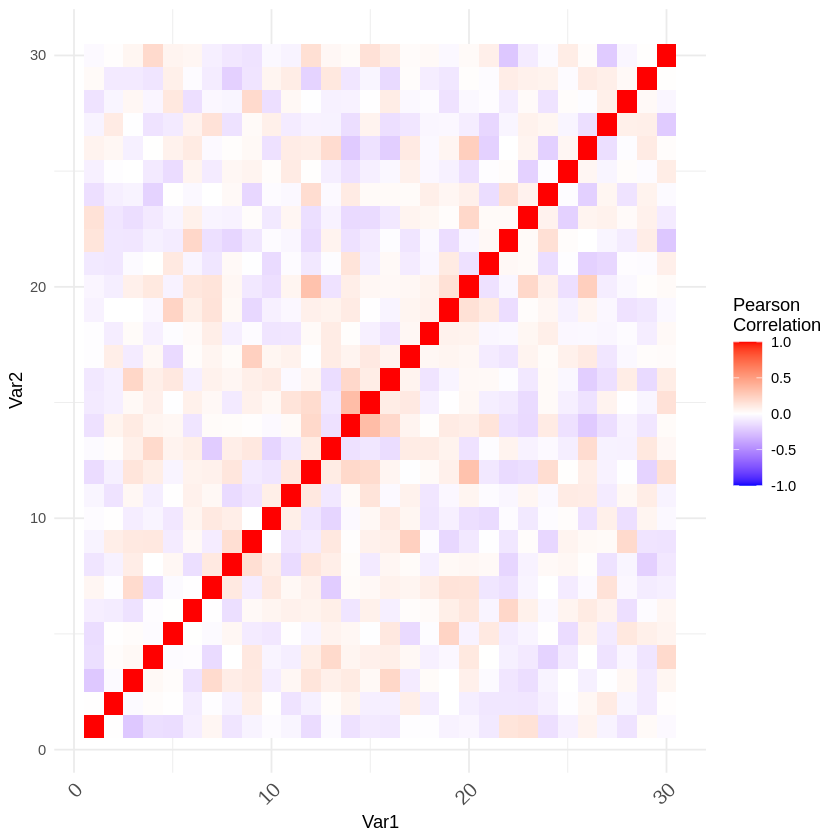

In [9]:
# Q2
install.packages("reshape2")
library(reshape2)
library(ggplot2)

# Create dataset
set.seed(123)
data <- matrix(sample(1:200, 100*30, replace=TRUE), nrow=100, ncol=30)

# Replace values with NA
data[data >= 10 & data <= 60] <- NA

# Count rows with NA
na_rows <- sum(apply(data, 1, function(x) any(is.na(x))))
print(na_rows)

# Replace NA with column mean
for (i in 1:ncol(data)) {
  col_mean <- mean(data[,i], na.rm=TRUE)
  data[is.na(data[,i]), i] <- col_mean
}

# Pearson correlation and heatmap
cor_matrix <- cor(data, method="pearson")
heatmap_data <- melt(cor_matrix)
ggplot(data=heatmap_data, aes(x=Var1, y=Var2, fill=value)) +
  geom_tile() +
  scale_fill_gradient2(low="blue", high="red", mid="white", midpoint=0, limit=c(-1,1), space="Lab", name="Pearson\nCorrelation") +
  theme_minimal() +
  theme(axis.text.x=element_text(angle=45, vjust=1, size=12, hjust=1))

# Select columns with correlation <= 0.7
selected_cols <- which(apply(cor_matrix, 2, function(x) all(abs(x) <= 0.7)))

# Normalize between 0 and 10
data <- (data - min(data)) / (max(data) - min(data)) * 10

# Replace values <= 0.5 with 1 else 0
data[data <= 0.5] <- 1
data[data > 0.5] <- 0


No id variables; using all as measure variables



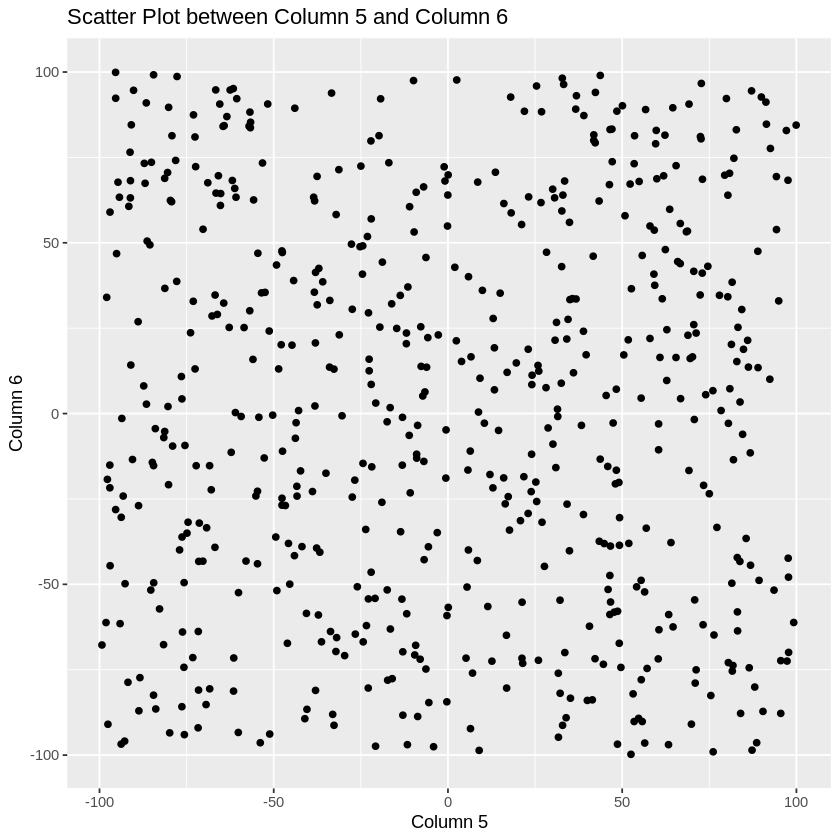

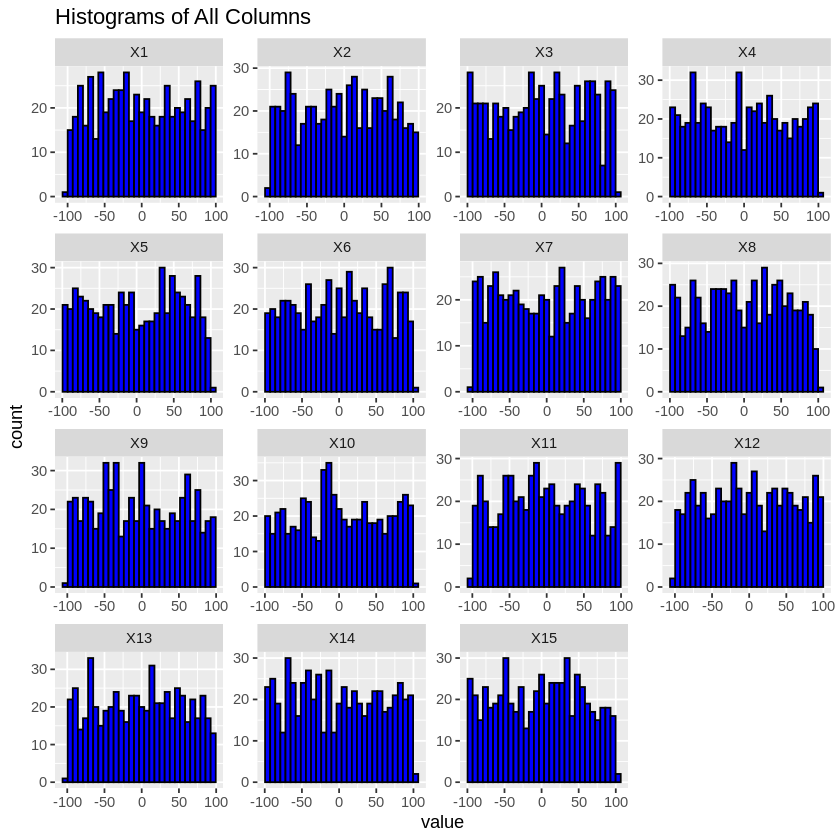

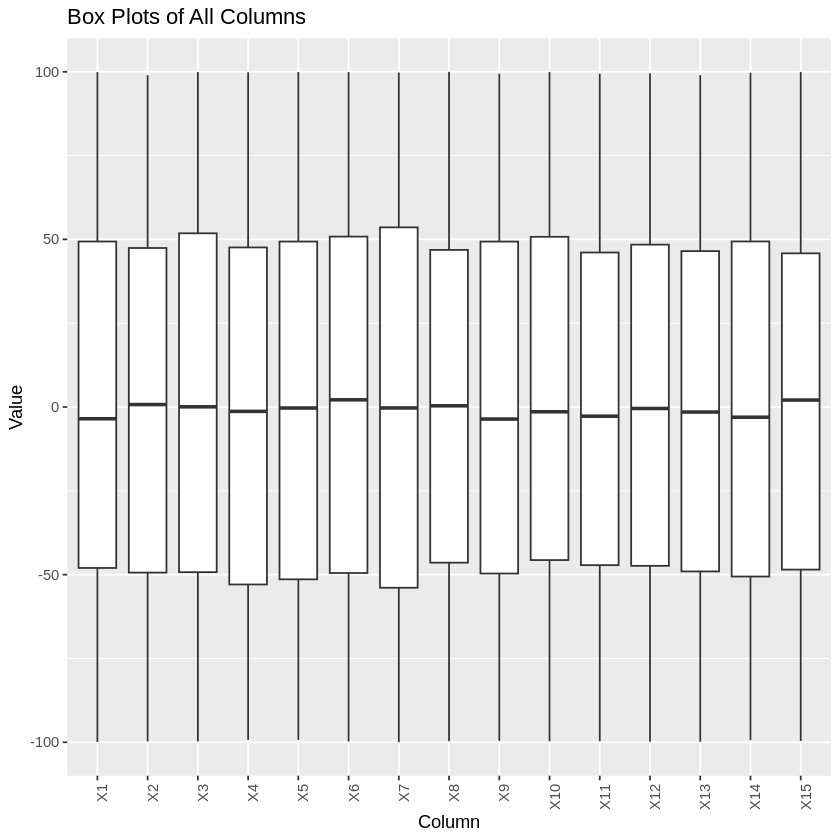

In [10]:
# Q4
# Install and load necessary libraries
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("reshape2", quietly = TRUE)) install.packages("reshape2")
library(ggplot2)
library(reshape2)

# Create dataset
set.seed(123)
data <- data.frame(matrix(runif(600 * 15, -100, 100), nrow = 600, ncol = 15))

# (i) Plot scatter graph between Column 5 and Column 6
ggplot(data, aes(x = data[,5], y = data[,6])) +
  geom_point() +
  labs(x = "Column 5", y = "Column 6", title = "Scatter Plot between Column 5 and Column 6")

# (ii) Plot histogram of each column in single graph
data_melt <- melt(data)
ggplot(data_melt, aes(x = value)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  facet_wrap(~ variable, scales = "free") +
  labs(title = "Histograms of All Columns")

# (iii) Plot the Box plot of each column in single graph
ggplot(data_melt, aes(x = variable, y = value)) +
  geom_boxplot() +
  labs(title = "Box Plots of All Columns", x = "Column", y = "Value") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


In [11]:
# Create dataset
set.seed(123)
data <- data.frame(matrix(runif(500 * 5, 5, 10), nrow = 500, ncol = 5))

# (i) Perform t-Test on each column
t_test_results <- apply(data, 2, function(column) t.test(column, mu = 7.5))
t_test_results

# (ii) Perform Wilcoxon Signed Rank Test on each column
wilcox_test_results <- apply(data, 2, function(column) wilcox.test(column, mu = 7.5))
wilcox_test_results

# (iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4
two_sample_t_test_result <- t.test(data[,3], data[,4])
wilcox_rank_sum_test_result <- wilcox.test(data[,3], data[,4])

two_sample_t_test_result
wilcox_rank_sum_test_result


$X1

	One Sample t-test

data:  column
t = -0.37079, df = 499, p-value = 0.711
alternative hypothesis: true mean is not equal to 7.5
95 percent confidence interval:
 7.351464 7.601373
sample estimates:
mean of x 
 7.476418 


$X2

	One Sample t-test

data:  column
t = -0.055988, df = 499, p-value = 0.9554
alternative hypothesis: true mean is not equal to 7.5
95 percent confidence interval:
 7.368610 7.624109
sample estimates:
mean of x 
  7.49636 


$X3

	One Sample t-test

data:  column
t = -0.4821, df = 499, p-value = 0.6299
alternative hypothesis: true mean is not equal to 7.5
95 percent confidence interval:
 7.345020 7.593909
sample estimates:
mean of x 
 7.469464 


$X4

	One Sample t-test

data:  column
t = 0.20319, df = 499, p-value = 0.8391
alternative hypothesis: true mean is not equal to 7.5
95 percent confidence interval:
 7.386422 7.639779
sample estimates:
mean of x 
 7.513101 


$X5

	One Sample t-test

data:  column
t = -0.69306, df = 499, p-value = 0.4886
alternative hy

$X1

	Wilcoxon signed rank test with continuity correction

data:  column
V = 61391, p-value = 0.7027
alternative hypothesis: true location is not equal to 7.5


$X2

	Wilcoxon signed rank test with continuity correction

data:  column
V = 62390, p-value = 0.9422
alternative hypothesis: true location is not equal to 7.5


$X3

	Wilcoxon signed rank test with continuity correction

data:  column
V = 61174, p-value = 0.6536
alternative hypothesis: true location is not equal to 7.5


$X4

	Wilcoxon signed rank test with continuity correction

data:  column
V = 63335, p-value = 0.8263
alternative hypothesis: true location is not equal to 7.5


$X5

	Wilcoxon signed rank test with continuity correction

data:  column
V = 60323, p-value = 0.4764
alternative hypothesis: true location is not equal to 7.5




	Welch Two Sample t-test

data:  data[, 3] and data[, 4]
t = -0.48279, df = 997.68, p-value = 0.6293
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2209985  0.1337259
sample estimates:
mean of x mean of y 
 7.469464  7.513101 



	Wilcoxon rank sum test with continuity correction

data:  data[, 3] and data[, 4]
W = 122733, p-value = 0.6197
alternative hypothesis: true location shift is not equal to 0
